In [4]:
# %matplotlib notebook
%matplotlib inline
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
plt.style.use('dark_background')
# plt.rcParams["font.family"] = "Times New Roman"
# import seaborn as sns
# sns.set_style("whitegrid")

from IPython.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))

from scipy.interpolate import interp1d
# from astropy.table import Table
# tbdata = Table.read('datafile', format='fits')
# df = tbdata.to_pandas()

# df['class'] = df['class'].str.decode('utf-8') 

# Plot
# fig = plt.figure(figsize=(5,5))
# ax1 = fig.add_subplot(1,1,1)
# fontsize=16

# ax1.set_xlabel(r"",fontsize=fontsize)
# ax1.set_ylabel(r"",fontsize=fontsize)
# ax1.set_title(r"",fontsize=fontsize)
# ax1.tick_params(axis='both', labelsize=fontsize)
# plt.tight_layout()

-97.05829726180293
325.3016166647375


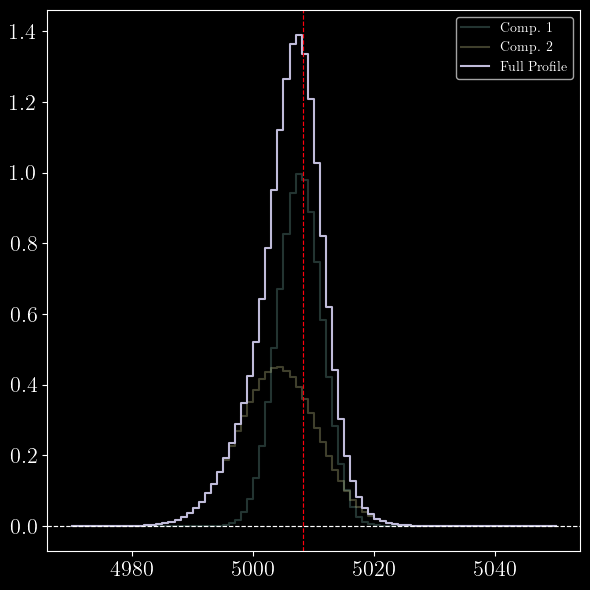

In [63]:
def gaussian(lam,center,amp,disp_kms,voff_kms,velscale=69.0):
    pix = np.arange(len(lam))
    interp_ftn = interp1d(lam,pix,kind="linear",bounds_error=False,fill_value=0.0)
    center_pix = interp_ftn(center)
    disp_pix = disp_kms/velscale
    voff_pix = voff_kms/velscale
#     print(center_pix,disp_pix,voff_pix)
    return amp*np.exp(-0.5*(pix-center_pix-voff_pix)**2/disp_pix**2) 

center = 5008.240
lam = np.arange(4970,5051,1)
g1 = gaussian(lam,center,1.0,250.0,0.0,velscale=69.0)
g2 = gaussian(lam,center,0.45,450.0,-250.0,velscale=69.0)
g  = g1+g2

# Calculate combined velocity moments
c = 299792.458 # speed of light (km/s)
f = g/np.sum(g)# normalized profile
v = (lam-center)/center*c# line-centered velocities
vint = np.trapz(v*f)/np.trapz(f)# integrated velocity
print(vint)
dint = np.sqrt(np.trapz(v**2*f)/np.trapz(f) - vint**2)
print(dint)
# Plot
fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot(1,1,1)
fontsize=16

ax1.step(lam,g1,alpha=0.25,label=r"$\textrm{Comp. 1}$")
ax1.step(lam,g2,alpha=0.25,label=r"$\textrm{Comp. 2}$")
ax1.step(lam,g,label=r"$\textrm{Full Profile}$")
ax1.axvline(5008.240,linewidth=0.85,linestyle="--",color="xkcd:bright red")

ax1.axhline(0.0,linewidth=0.85,linestyle="--",color="xkcd:white")
ax1.set_xlabel(r"",fontsize=fontsize)
ax1.set_ylabel(r"",fontsize=fontsize)
ax1.set_title(r"",fontsize=fontsize)
ax1.tick_params(axis='both', labelsize=fontsize)
ax1.legend()

plt.tight_layout()

In [54]:
# normalize the emission line 
l = g/np.sum(g)
# calculate the central velocity


0.9999999999999999
